# Вежба 0: Инсталација на потребните пакети за оваа глава

In [218]:
!pip3 install sklearn numpy scipy pandas matplotlib

# Вежба 1: Стандардизација на континуални податоци

In [3]:
import pandas as pd

print(pd.__version__)


1.4.2


 За оваа вежба треба да се вчита датотеката exams.csv

По вчитување на фајлот, потребно е да ги вчитаме податоците, каде како знак на наводник се користи ".
Станува збор за 8 колекции (колони) и 100 податочни точки за секоја колекција

In [4]:
exam_data = pd.read_csv('Exercises 5 - Datasets/exams.csv', quotechar='"')
exam_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,standard,completed,79,75,81
1,female,group C,associate's degree,free/reduced,none,56,65,64
2,male,group D,bachelor's degree,standard,none,86,68,74
3,female,group A,bachelor's degree,standard,none,68,78,76
4,female,group D,high school,free/reduced,none,49,68,61
...,...,...,...,...,...,...,...,...
95,female,group A,master's degree,free/reduced,completed,59,76,80
96,female,group D,high school,free/reduced,none,60,62,61
97,female,group C,some college,standard,none,69,82,83
98,male,group D,some high school,standard,none,89,83,79


Сакаме да ги видиме средниот поени по математика, читање и пишување

In [54]:
math_average = exam_data['math score'].mean()
reading_average = exam_data['reading score'].mean()
writing_average = exam_data['writing score'].mean()

print(math_average)
print(reading_average)
print(writing_average)

65.06
67.28
66.47


Следи процедурата за стандардизација на податочните колекции. За таа цел се користи scale функцијата од preprocessing класта во рамки на scikit-learn.
Забележете ги нормализираните (стандардизираните) вредности на поените по математика, читање и пишување

In [55]:
from sklearn import preprocessing

exam_data['math score'] = preprocessing.scale(exam_data['math score'])
exam_data['reading score'] = preprocessing.scale(exam_data['reading score'])
exam_data['writing score'] = preprocessing.scale(exam_data['writing score'])

exam_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,standard,completed,0.994557,0.574138,1.049901
1,female,group C,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
2,male,group D,bachelor's degree,standard,none,1.493976,0.053547,0.544099
3,female,group A,bachelor's degree,standard,none,0.209756,0.797248,0.688613
4,female,group D,high school,free/reduced,none,-1.145810,0.053547,-0.395248
...,...,...,...,...,...,...,...,...
95,female,group A,master's degree,free/reduced,completed,-0.432354,0.648508,0.977643
96,female,group D,high school,free/reduced,none,-0.361008,-0.392675,-0.395248
97,female,group C,some college,standard,none,0.281101,1.094729,1.194416
98,male,group D,some high school,standard,none,1.708013,1.169099,0.905386


Новите средни вредности за овие колони (колекции на податоци) треба имаат вредност приближно еднаква на 0

In [56]:
math_average = exam_data['math score'].mean()
reading_average = exam_data['reading score'].mean()
writing_average = exam_data['writing score'].mean()

print(math_average)
print(reading_average)
print(writing_average)

-1.5693175925424186e-16
-1.4432899320127036e-16
6.217248937900877e-17


Досега работевме со контиуални податоци (колекции), во наредниот вежба ќе работиме со категорични вредности на податоците

# Вежба 2: Репрезентација на категорични променливи

Најчесто кога помеѓу категоричните променливи споредбата има некакво значење се користи LabelEncoder().
Притоа се користи fit_transform методот кој ќе ги измине сите категорични вредности во колоната gender (пол) и истите ќе ги трансформира во броеви

In [57]:
le = preprocessing.LabelEncoder()
exam_data['gender'] = le.fit_transform(exam_data['gender'].astype(str))

Со проверка на податоците може да се увидат променетите вредности на gender колоната (1-машки пол, 0-женски пол)

In [58]:
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group E,associate's degree,standard,completed,0.994557,0.574138,1.049901
1,0,group C,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
2,1,group D,bachelor's degree,standard,none,1.493976,0.053547,0.544099
3,0,group A,bachelor's degree,standard,none,0.209756,0.797248,0.688613
4,0,group D,high school,free/reduced,none,-1.145810,0.053547,-0.395248


Со помош на classes_ ќе се прикажат уникатните вредности на соодветната колона

In [59]:
le.classes_

array(['female', 'male'], dtype=object)

One-hot енкодирање се постигнува многу лесно со користење на библиотеката Pandas. Секоја категорична променлива со помош на овој метод се енкодира со One-hot репрезентација. Конкретно во случај на раса/етнос секој студент припаѓа во една од групите од A до E.

In [60]:
pd.get_dummies(exam_data['race/ethnicity'])

,group A,group B,group C,group D,group E
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
95,1,0,0,0,0
96,0,0,0,1,0
97,0,0,1,0,0
98,0,0,0,1,0


Сега потребно е да ја замениме категоричната колона со One-hot репрезентација на истата

In [61]:
exam_data = pd.get_dummies(exam_data, columns=['race/ethnicity'])

In [62]:
exam_data

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,associate's degree,standard,completed,0.994557,0.574138,1.049901,0,0,0,0,1
1,0,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476,0,0,1,0,0
2,1,bachelor's degree,standard,none,1.493976,0.053547,0.544099,0,0,0,1,0
3,0,bachelor's degree,standard,none,0.209756,0.797248,0.688613,1,0,0,0,0
4,0,high school,free/reduced,none,-1.145810,0.053547,-0.395248,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,master's degree,free/reduced,completed,-0.432354,0.648508,0.977643,1,0,0,0,0
96,0,high school,free/reduced,none,-0.361008,-0.392675,-0.395248,0,0,0,1,0
97,0,some college,standard,none,0.281101,1.094729,1.194416,0,0,1,0,0
98,1,some high school,standard,none,1.708013,1.169099,0.905386,0,0,0,1,0


Истиот метод може да се користи на повеќе категорични колони истовремено, како во случајов:

In [63]:
exam_data = pd.get_dummies(exam_data, columns=['parental level of education', 'lunch', 'test preparation course'])

In [64]:
exam_data.head()

,gender,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0.994557,0.574138,1.049901,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0
1,0,-0.646391,-0.169564,-0.178476,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
2,1,1.493976,0.053547,0.544099,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
3,0,0.209756,0.797248,0.688613,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,0,-1.145810,0.053547,-0.395248,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1


Со ова сите податоци се во нумеричка форма и се спремни да се користат за тренирање на соодветен модел за машинско учење

# Вежба 3: Репрезентација на текстуални податоци во нумеричка форма

Ја импортираме CountVectorizer класата со цел да работиме со frequencey-based репрезентација

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

Ова е корпусот кој ќе го користиме и содржи 4 документи

In [66]:
corpus = ['This is the first document.',
          'This is the second document.',
          'Third document. Document number three',
          'Number four. To repeat, number four']

Ја иницијализираме класата со CountVectorizer()
За да секој збор во корпусот добие уникатно ID се користи vectorizer.fit(<data>). Со ова се учи целиот речник. 
Методот vectorizer.transform(<data>) ги назначува генерираните уникатни ID-а на соодветните зборови.
Како и да е, најчесто се користат двата методи истовременo со користење на методот vectorizer.fit_transform(<data>) кој генерира торба од зборови
bag_of_words е sparse 4x12 матрица бидејќи во корпусот има 4 документи со вкупно 12 зборови.

In [67]:
vectorizer = CountVectorizer()
bag_or_words = vectorizer.fit_transform(corpus)
bag_or_words

<4x12 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

Се печати bag_of_words во следниов формат:
(ID на документ, ID на збор)    фреквенција на појавување

In [68]:
print(bag_or_words)

  (0, 9)	1
  (0, 3)	1
  (0, 7)	1
  (0, 1)	1
  (0, 0)	1
  (1, 9)	1
  (1, 3)	1
  (1, 7)	1
  (1, 0)	1
  (1, 6)	1
  (2, 0)	2
  (2, 8)	1
  (2, 4)	1
  (2, 10)	1
  (3, 4)	2
  (3, 2)	2
  (3, 11)	1
  (3, 5)	1


За да го видиме ID-то на зборот second, го користиме следниов код

In [69]:
vectorizer.vocabulary_.get('second')

6

Еве ги сите 12 зборови во речникот

In [70]:
vectorizer.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 1,
 'document': 0,
 'second': 6,
 'third': 8,
 'number': 4,
 'three': 10,
 'four': 2,
 'to': 11,
 'repeat': 5}

In [71]:
import pandas as pd

print(pd.__version__)

1.4.2


За да го видиме во табеларен формат ни треба pandas библиотеката. Во табелата редовите ги претставуваат документите, а колоните се зборовите од речникот. Вредностите се фреквенциите на секој збор во даден документ.

In [72]:
pd.DataFrame(bag_or_words.toarray(), columns=vectorizer.get_feature_names_out())

,document,first,four,is,number,repeat,second,the,third,this,three,to
0,1,1,0,1,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,1,1,0,1,0,0
2,2,0,0,0,1,0,0,0,1,0,1,0
3,0,0,2,0,2,1,0,0,0,0,0,1


Еве пример како се користи TF-IDF алгоритам за доделување на вредност на секој од зборовите

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
bag_of_words = vectorizer.fit_transform(corpus)

Еве ја bag_of_words репрезентацијата. Секој збор во секој документ има асоцирана TF-IDF вредност

In [74]:
print(bag_of_words)

  (0, 0)	0.3528554929793508
  (0, 1)	0.5528163151092931
  (0, 7)	0.43584673254990375
  (0, 3)	0.43584673254990375
  (0, 9)	0.43584673254990375
  (1, 6)	0.5528163151092931
  (1, 0)	0.3528554929793508
  (1, 7)	0.43584673254990375
  (1, 3)	0.43584673254990375
  (1, 9)	0.43584673254990375
  (2, 10)	0.4850008395708102
  (2, 4)	0.3823802326982809
  (2, 8)	0.4850008395708102
  (2, 0)	0.6191395067937654
  (3, 5)	0.3432724906138499
  (3, 11)	0.3432724906138499
  (3, 2)	0.6865449812276998
  (3, 4)	0.5412799489419371


In [75]:
vectorizer.vocabulary_.get('second')

6

Вредностите во табеларниот приказ сега се TF-IDF вредност, а не фреквенција на зборот

In [76]:
pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

,document,first,four,is,number,repeat,second,the,third,this,three,to
0,0.352855,0.552816,0.000000,0.435847,0.00000,0.000000,0.000000,0.435847,0.000000,0.435847,0.000000,0.000000
1,0.352855,0.000000,0.000000,0.435847,0.00000,0.000000,0.552816,0.435847,0.000000,0.435847,0.000000,0.000000
2,0.619140,0.000000,0.000000,0.000000,0.38238,0.000000,0.000000,0.000000,0.485001,0.000000,0.485001,0.000000
3,0.000000,0.000000,0.686545,0.000000,0.54128,0.343272,0.000000,0.000000,0.000000,0.000000,0.000000,0.343272


In [77]:
vectorizer.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 1,
 'document': 0,
 'second': 6,
 'third': 8,
 'number': 4,
 'three': 10,
 'four': 2,
 'to': 11,
 'repeat': 5}

Во примеров наместо CountVectorizer користиме HashingVectorizer со кој вршиме хаширање на 12-те зборови во 8 корпи (n_features=8). Резултатот е НОРМАЛИЗИРАНА нумеричка репрезентација на сите зборови во 4-те документи. Забележете дека ID-то на зборовите сега е од 0 до 7, односно повеќе зборови се хеширале во иста корпа

In [78]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(n_features=8)
feature_vector = vectorizer.fit_transform(corpus)
print(feature_vector)

  (0, 0)	-0.8944271909999159
  (0, 5)	0.4472135954999579
  (0, 6)	0.0
  (1, 0)	-0.5773502691896258
  (1, 3)	0.5773502691896258
  (1, 5)	0.5773502691896258
  (1, 6)	0.0
  (2, 0)	-0.7559289460184544
  (2, 3)	0.3779644730092272
  (2, 5)	0.3779644730092272
  (2, 7)	0.3779644730092272
  (3, 0)	0.31622776601683794
  (3, 3)	0.31622776601683794
  (3, 5)	0.6324555320336759
  (3, 7)	0.6324555320336759


# Вежба 4: Имплементација на линеарна регресија со scikit-learn

In [79]:
import pandas as pd

print(pd.__version__)

1.4.2


Нашиот регресиски проблем ќе биде предвидување на цената на автомобилите. Податоците се одвоени со запирка и ќе користиме python engine за вчитување во pandas dataframe. Податоците имаат повеќе од 20 колони (особини) за повеќе од 200 возила (редови). Некои од особините се: типот на гориво, должина на возилото, производител, итн.

In [82]:
auto_data = pd.read_csv('Exercises 5 - Datasets\imports-85.data', sep=r'\s*,\s*', engine='python')
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


Забележете дека вредностите кои недостасуваат се означени со ?. Тие вредност ќе ги замениме со NaN (Not a Number) вредности за да можеме да користиме функции кои лесно работат со NaN вредности

In [83]:
import numpy as np

auto_data = auto_data.replace('?', np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


describe() функцијата го опишува целото податочно множество со број, средна вредност, стандардна девијација, минимална и максимална вредност, како и вредности за одреден перцентил

In [84]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


За добиеме статистика и за зависната променлива (price) го користиме параметарот include='all'

In [85]:
auto_data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,8921
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


Ако ја опишеме само колоната price ќе видиме дека е од тип објект и тој не може да биде сумаризиран со нумеричка статистика

In [86]:
auto_data['price'].describe()

count      201
unique     186
top       8921
freq         2
Name: price, dtype: object

Па затоа типот на оваа колона го конвертираме во децимална вредност со користење на to_numeric методот. Притоа со errors='coerce' ги игнорираме грешките. По конверзијата ја прегледуваме колоната price која сега е тип float64

In [87]:
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce')
auto_data['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

Доколку некои променливи сметаме дека не се битни во предвидувањето на цената, истите може лесно да ги отстраниме со помош на методот drop(). Пример е normalized-losses која ја дава вредноста на загубата при исплата на осигурување, која не дава информација за цената на возилото

In [88]:
auto_data = auto_data.drop('normalized-losses', axis=1)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


Повторно правиме преглед на табуларните податоци

In [89]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


Промелнивата horsepower ја претвораме во децимална вредност

In [90]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data['horsepower'].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

num-of-cylinders е категорична променлива, па затоа со помош на речникот cylinder_dict ја претвораме во нумеричка променлива. Ова не енкодирање туку само доделивање на нумеричка вредност со користење на помошен речник (dictionary)

In [91]:
auto_data['num-of-cylinders'].describe()

count      205
unique       7
top       four
freq       159
Name: num-of-cylinders, dtype: object

In [92]:
cylinder_dict = {'two': 2,
                 'three': 3,
                 'four': 4,
                 'five': 5,
                 'six': 6,
                 'eight': 8,
                 'twelve': 12}

auto_data['num-of-cylinders'].replace(cylinder_dict, inplace=True)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450.0


Ако ги погледнеме повторно податоците, ќе забележиме мноштво на категорични променливи кои ги заменуваме со нумерички на следниов начин (види Вежба 2)

In [93]:
auto_data = pd.get_dummies(auto_data,
                           columns=['make',
                                    'fuel-type',
                                    'aspiration',
                                    'num-of-doors',
                                    'body-style',
                                    'drive-wheels',
                                    'engine-location',
                                    'engine-type',
                                    'fuel-system'])
auto_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0


Ги чистиме податоците со тоа што ги отстрануваме редовите кои имаа барем една NaN вредност. Со тоа бројот на возила (редови) од 205 се намали на 195

In [94]:
auto_data = auto_data.dropna()
auto_data

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,...,1,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.4,...,0,0,0,0,0,1,0,0,0,0


Сега проверуваме дали имаме null вредности. Гледаме дека податоците не содржат null вредности

In [95]:
auto_data[auto_data.isnull().any(axis=1)]

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


Откако ги предпроцесиравме податоците сега сме спремни да ги користиме истите за да го истренираме нашиот модел
Методот train_test_split() ни овозможува лесен начин да ги поделиме податоците на тренинг и тест множество. Тренинг множеството се користи за да се истренира моделот, додека пак, тест множеството за да се евалуира истиот
Во X ги ставаме само зависните променливи (причината), тоа се сите променливи освен price
Во Y ја ставаме зависната променлива (ефектот, лабелата), тоа е променливата price.
Во нашиот пример 20% од податоците ќе бидат искористени за тестирање на моделот, а 80% за тренирање на истиот

In [96]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('price', axis=1)

#taking the labels (price)
Y = auto_data['price']

#spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

За да го истренираме линеарниот регресиски модел потребно е да истанцираме објект од класата LineraRegression.
Со ова веќе имаме естиматор на кој го повикуваме fit() методот со тренинг множеството (X и Y)
X променливите ќе бидат ископирани и нема да бидат пребришани од естиматор во фазата на тренирање
fit_intercept=True - кажува дека регресиската линија ќе го има и коефициентот А, односно дека податоците не се нормализирани и правата нема да минува низ координатниот почеток.
normalize=False - нема да извршиме нормализација на податоците, процес сличен на стандардизација (види Вежба 1) каде се одзема средната вредност и се дели со L2 нормата (наместо со стандрадната девијација)

In [97]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression()
linearModel.fit(X_train, Y_train)

LinearRegression()

Ја добиваме R2 вредноста (која е доста висока, блиску до 0.97) и кажува дека моделот опфаќа голем дел од варијансата на нашето тренинг множество

In [98]:
linearModel.score(X_train, Y_train)

0.967922737092433

Можеме да ги видиме коефициентите на линеарната регресија

In [99]:
linearModel.coef_

array([-5.80061464e+02,  3.06874682e+02, -1.06499194e+02,  1.52236727e+02,
       -5.05771408e+02,  5.30902624e+00, -4.15988710e+03,  2.82885047e+02,
       -1.75044342e+04, -4.49860407e+03, -1.59555122e+03, -4.82296063e+01,
        2.15673623e+00, -6.79852969e+01,  1.73362582e+02, -3.74284422e+03,
        3.71721668e+03,  6.86565908e+03, -4.12474818e+03, -4.48093478e+03,
       -2.94555422e+02, -4.74283895e+03,  3.47319261e+03, -4.08732786e+02,
        3.02841192e+03,  2.30284405e+03, -4.71448781e+03, -6.67651176e+02,
       -8.40276958e+03, -5.25933085e+03,  1.04713265e+04,  1.81898940e-11,
        8.36042927e+03, -4.81543507e+02, -2.06062392e+03,  6.21153583e+01,
        1.09986569e+03,  6.06615966e+03, -6.06615966e+03, -1.38232301e+03,
        1.38232301e+03,  3.37569880e+03,  3.28229109e+03,  2.99875643e+03,
       -1.00643481e+03, -1.20820627e+03, -3.92414032e+02, -3.91701310e+02,
       -4.99487338e+02, -6.59140532e+02,  1.15862787e+03, -2.46748485e+03,
        2.46748485e+03, -

За да ги поврземе коефициентите со соодветните променливи користиме pd.Series() а со сортирање на вредностите можеме да ја видиме тежината е дадена на соодветната променлива од страна на крајниот линеарен регресиски модел.
Негативните вредности (корелации) кажуваат дека овие променливи ја намалуваат цената на автомобилот, додека пак, позитивните дека ја зголемуваат истата. Па така, porche, mercedes-benz се скапи автомобили за разлика од plymouth, mitsubishi и toyota.
Вредностите коие се блиски до 0, укажуваат дека соодветните променливи воопшто не влијаат на цената на автомобилот

In [100]:
predictors = X_train.columns
coef = pd.Series(linearModel.coef_, predictors).sort_values()
print(coef)

bore               -17504.434184
make_peugot         -8402.769583
fuel-type_gas       -6066.159660
make_plymouth       -5259.330848
make_isuzu          -4742.838945
                        ...     
fuel-system_idi      6066.159660
fuel-type_diesel     6066.159660
make_bmw             6865.659076
make_saab            8360.429269
make_porsche        10471.326516
Length: 68, dtype: float64


Сега ќе го користиме тренираниот модел за го тестираме користејќи го тест множеството. Предвидените цени ќе ги чуваме во y_predict променливата

In [101]:
y_predict = linearModel.predict(x_test)

In [102]:
y_predict

array([10057.07293877, 24826.86025793,  8257.54623336,  5756.02432516,
       18123.77811725,  8138.40447534,  9913.46711717, 36088.00375719,
        7066.96620474,  5208.7703284 , 21334.71091108, 18624.83213057,
       15844.98725665, 11548.5664369 , 20777.75004026, 15822.56527453,
       15510.51860376, 30546.3875583 , 47090.26954491,  7193.59605919,
        5692.87553369,  9187.20691827,  8914.45743491,  6296.59792394,
       32686.93260339, 10944.44678673, 17923.24055465, 10169.90685647,
        9296.54170626, 47090.26954491, 10588.87591872,  8960.30194416,
       47471.52613526,  8991.83493211, 20025.47702691, 10609.43591573,
        7705.18489163, 18171.56624823, 11564.52197795])

За да ги споредиме визуелно ќе ја користиме matplotlib библиотеката. Предвидените вредности се означени со сина боја, додека пак, актуелните вредности на цената се означени со портокалова боја

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


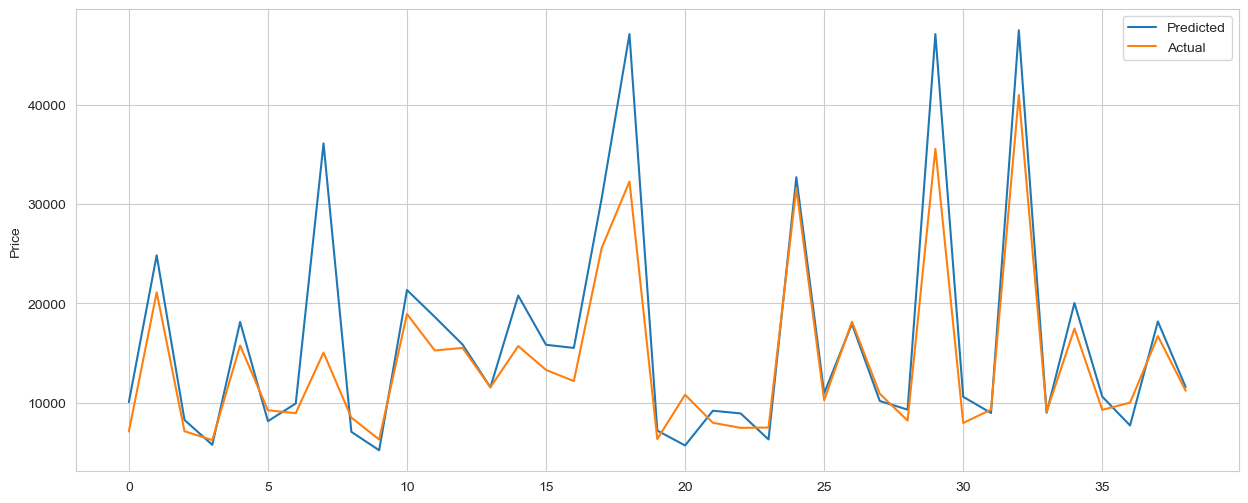

In [103]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')
plt.legend()
plt.show()

За да видиме колку добро предвидува нашиот модел врз тест множеството ја користиме R2 вредноста, која сега изнесува околу 0.63 и е значително помала од тренинг множеството

In [104]:
r_square = linearModel.score(x_test, y_test)
r_square

0.6322583416123835

Можеме да го пресметаме и MSE за тест множеството

In [105]:
from sklearn.metrics import mean_squared_error

linear_model_mse = mean_squared_error(y_predict, y_test)
linear_model_mse

26099937.604292464

Уште подобра метрика е RMSE (која е квадратен корен од MSE). Ова ни кажува дека предвидената цена е за околу 5109 долари поразлична од актуелната цена (помала или поголема)

In [106]:
import math

math.sqrt(linear_model_mse)

5108.809803104091

Ја инстанцираме Lasso класата и како параметар го даваме alpha хиперпараметарот за да се спречи Overfitting. Тука одлучуваме да го нормализираме податоците, односно од податоците ја одземаме средната вредност и потоа разликата ја делиме со L2 нормата

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

lasso_model = Lasso(alpha=.5)
lasso_model.fit(X_train_scaled, Y_train)

C:\Users\dimit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.390e+07, tolerance: 9.783e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

Гледаме помала вредност за R2 за разлика од едноставната MSE регресија

In [112]:
lasso_model.score(X_train, Y_train)

C:\Users\dimit\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


-2572504.564909205

Ги печатиме коефициентите од каде може да се види дека голем број од коефициентите имаат вредност 0, односно поради нивната комплексност биле пенализирани од Lasso

In [113]:
coef = pd.Series(lasso_model.coef_, predictors).sort_values()
print(coef)

compression-ratio    -5927.468845
bore                 -4529.365181
num-of-cylinders     -3975.400017
make_peugot          -1790.166813
horsepower           -1667.371472
                         ...     
make_porsche          1695.471314
wheel-base            1756.652107
curb-weight           2605.059235
fuel-type_diesel      5245.095760
engine-size          10743.740081
Length: 68, dtype: float64


In [114]:
y_predict = lasso_model.predict(x_test)

C:\Users\dimit\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Од сликата може да се види дека предвидените вредноси за тест множеството се многу поблиску до актуелни во споредба со актуелните вредности

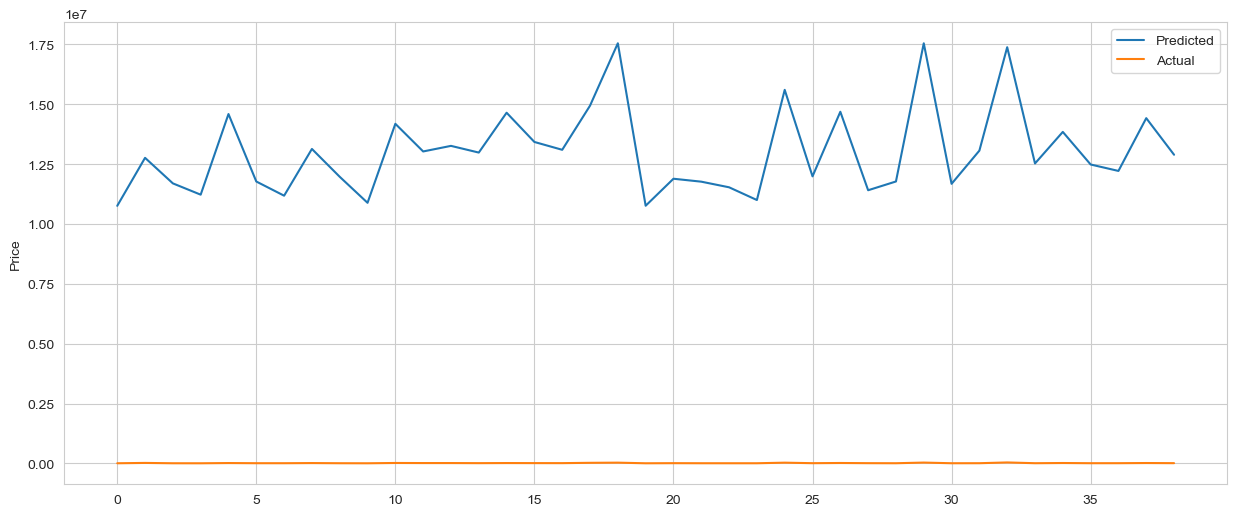

In [121]:
from matplotlib import pylab

pylab.rcParams['figure.figsize'] = (15, 6)
plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

Забележувате дека го намаливме overfitting, со тоа што добивме помал R2 за тест множеството

In [116]:
r_square = lasso_model.score(x_test, y_test)
r_square

C:\Users\dimit\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


-2426674.1949371183

За разлика од линеарниот модел со Lasso правиме скоро двојно помала грешка во предвидената цена

In [117]:
lasso_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(lasso_model_mse)

13123635.052959394

**Самостојна работа**: Пробајте да ја промените вредноста на alpha да биде 5 и обидете се сами да извлечете заклучоци. Дали overfitting-от ќе биде намален?
За да ја добиете вредноста на alpha со која ќе добиете најдобар модел се користи Grid Search (ова ќе биде разгледано понатаму во курсот)

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

ridge_model = Ridge(alpha=0.05)
ridge_model.fit(X_train_scaled, Y_train)

Ridge(alpha=0.05)

In [125]:
ridge_model.score(X_train, Y_train)

C:\Users\dimit\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


-2536536.402189322

In [126]:
coef = pd.Series(ridge_model.coef_, predictors).sort_values()
print(coef)

compression-ratio    -5526.718175
bore                 -4203.159549
num-of-cylinders     -3527.710877
make_peugot          -1764.649184
fuel-type_gas        -1565.490251
                         ...     
fuel-type_diesel      1565.490251
make_porsche          1666.413200
wheel-base            1739.252839
curb-weight           2585.718743
engine-size          10200.745064
Length: 68, dtype: float64


In [127]:
y_predict = ridge_model.predict(x_test)

C:\Users\dimit\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


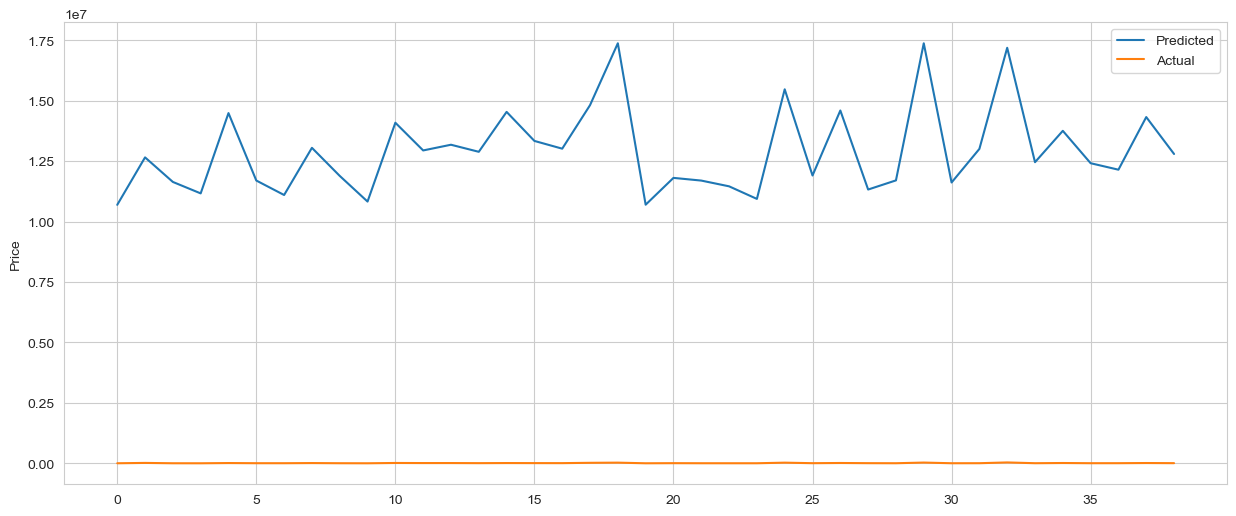

In [128]:
pylab.rcParams['figure.figsize'] = (15, 6)
plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Price')

plt.legend()
plt.show()

In [129]:
r_square = ridge_model.score(x_test, y_test)
r_square

C:\Users\dimit\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


-2390966.2928043287

In [130]:
ridge_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(ridge_model_mse)

13026721.75884997

**Самостојна работа**: Извршете го кодот за Ridge регресискиот модел и споредете го со Lasso. Пробајте да ја промените вредноста на alpha да биде 0.5 (наместо 0.05) и обидете се сами да извлечете заклучоци. 
Дали добивте подобар модел со alpha=0.5 или alpha=0.05?
Но што ако alpha го поставите на 1.0, дали ќе добиете подобар модел?

# Вежба 5: Користење на SVM за класификација на текст

Ќе користиме готово податочно множество кое го нуди scikit-learn. Ќе го користиме модулот fetch_20newsgroups модулот за да ги добиеме податоците. Множеството содржи околу 20000 инстанци кои се распределени во 20 категории

In [133]:
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

twent_train претставува речник и со помош на следната наредба ги добиваме клучевите на овој речник. Документите се наоѓаат во data клучот, додека пак, категориите на секој документ се наоѓаат во target_names (ова се лабелите или y променливата)

In [134]:
twenty_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

Да видиме како изгледа текстот за еден документ. Станува збор за мејл поврзан со возила

---



In [135]:
print(twenty_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----


Сега да ги видиме 20-те категории

In [136]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Нашата категорична y зависна променлива треба да се изрази во нумеричка форма. За таа цел го имаме target клучот од речникот

In [137]:
twenty_train.target

array([7, 4, 4, ..., 3, 1, 8])

Секој документ е во текстуален формат и секој документ има потреба да се претстави во нумеричка форма. Ја прикажуваме големината на добиената sparse матрица.

In [138]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

Со следнава наредба го прикажуваме бројот на појавувања на секој збор во секој документ и тоа во следниов формат:
(ID на документ, ID на збор)   Број на појавувања

In [139]:
print(X_train_counts[0])

  (0, 56979)	3
  (0, 75358)	2
  (0, 123162)	2
  (0, 118280)	2
  (0, 50527)	2
  (0, 124031)	2
  (0, 85354)	1
  (0, 114688)	1
  (0, 111322)	1
  (0, 123984)	1
  (0, 37780)	5
  (0, 68532)	3
  (0, 114731)	5
  (0, 87620)	1
  (0, 95162)	1
  (0, 64095)	1
  (0, 98949)	1
  (0, 90379)	1
  (0, 118983)	1
  (0, 89362)	3
  (0, 79666)	1
  (0, 40998)	1
  (0, 92081)	1
  (0, 76032)	1
  (0, 4605)	1
  :	:
  (0, 37565)	1
  (0, 113986)	1
  (0, 83256)	1
  (0, 86001)	1
  (0, 51730)	1
  (0, 109271)	1
  (0, 128026)	1
  (0, 96144)	1
  (0, 78784)	1
  (0, 63363)	1
  (0, 90252)	1
  (0, 123989)	1
  (0, 67156)	1
  (0, 128402)	2
  (0, 62221)	1
  (0, 57308)	1
  (0, 76722)	1
  (0, 94362)	1
  (0, 78955)	1
  (0, 114428)	1
  (0, 66098)	1
  (0, 35187)	1
  (0, 35983)	1
  (0, 128420)	1
  (0, 86580)	1


Излезот од CountVectorizer го праќаме како влез на TfidfTransformer. TfidfTransformer е различно од TfidfVectorizer. TfidfVectorizer работи на самиот документ и директно креира вредност за секој (ID на документ, ID на збор) пар. Додека пак, TfidfTransformer бара на влез вреќа од зборови (што е всушност излезот од CountVectorizer)
Односно:
CountVectorizer + TfidfTransformer == TfidfVectorizer

In [140]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

Да ги видиме вредностите за првиот документ

In [141]:
print(X_train_tfidf[0])

  (0, 128420)	0.04278499079283093
  (0, 128402)	0.05922294083277842
  (0, 128026)	0.060622095889758885
  (0, 124931)	0.08882569909852546
  (0, 124031)	0.10798795154169122
  (0, 123989)	0.08207027465330353
  (0, 123984)	0.036854292634593756
  (0, 123796)	0.049437556160455476
  (0, 123292)	0.14534718515938805
  (0, 123162)	0.2597090245735688
  (0, 118983)	0.037085978050619146
  (0, 118280)	0.2118680720828169
  (0, 115475)	0.042472629883573
  (0, 114731)	0.14447275512784058
  (0, 114688)	0.06214070986309586
  (0, 114579)	0.03671830826216751
  (0, 114455)	0.12287762616208957
  (0, 114428)	0.05511105154696676
  (0, 113986)	0.17691750674853082
  (0, 111322)	0.01915671802495043
  (0, 109581)	0.10809248404447917
  (0, 109271)	0.10844724822064673
  (0, 108252)	0.07526015712540636
  (0, 106116)	0.09869734624201922
  (0, 104813)	0.08462829788929047
  :	:
  (0, 56979)	0.057470154074851294
  (0, 51793)	0.13412921037839678
  (0, 51730)	0.09714744057976722
  (0, 50527)	0.054614286588587246
  (0, 5011

Инстанцираме Линеарна SVC, како функција за пенализација користиме l2 норма
Со параметарот tol наведуваме толеранција за стопирање на тренирањето на нашиот модел. Ако загубите кои ги пресметуваме на нашата целна функција паднат под вредноста на tol (во случајов тоа е 0.001) процесот на тренирање ќе заврши и финалниот модел ќе биде креиран

In [142]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty='l2', dual=False, tol=1e-3)
clf_svc.fit(X_train_tfidf, twenty_train.target)

LinearSVC(dual=False, tol=0.001)

За да го подготвиме податочното множество потребни се низа од трансформации. Ова се постигнува со Pipeline класата каде при инстанцирање се наведуваат по редослед соодветните трансформации врз податочното множество и тоа во нашиот случај е:


1.   Креирање на вреќа од зборови
2.   TF-IDF трансформација на вреќата од зборови и добивање TF-IDF вредност за секој (ID на документ, ID на збор) пар
3.   Користење на линеарен SVM модел како класификатор



In [143]:

from sklearn.pipeline import Pipeline

clf_svc_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC(penalty='l2', dual=False, tol=0.001))
])

Со извршување на fit методот врз предефинираниот pipeline ќе започнаме со тренирањето на нашиот модел

In [144]:
clf_svc_pipeline.fit(twenty_train.data, twenty_train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(dual=False, tol=0.001))])

Ги симнуваме тест податоците

In [145]:
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

Целиот pipeline се извршува и врз тест податоците

In [146]:
predicted = clf_svc_pipeline.predict(twenty_test.data)

Еден начин за да се евалуира моделот е да се пресмета неговата точност. Во случајов за околу 85% од текстовите од тест множеството нашиот модел бил во право во однос на класификацијата во соодветната категорија

In [147]:
from sklearn.metrics import accuracy_score

acc_svm = accuracy_score(twenty_test.target, predicted)
acc_svm

0.8532926181625067

**Самостојна работа** - Променето го SVM класификаторот да користи l1 норма, наместо l2 и извршете го потребниот код. Што приметувате? Дали точноста се подобри или влоши?

Сега наместо да го користиме TfidfTransformer да користиме само CountVectorizer во нашиот pipeline

In [148]:
clf_svc_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LinearSVC(penalty='l2', dual=False, tol=0.001))
])

Што приметувате? Дали е подобро да се користи само вреќа од зборови или tf-idf трансформатор?

In [149]:
clf_svc_pipeline.fit(twenty_train.data, twenty_train.target)
predicted = clf_svc_pipeline.predict(twenty_test.data)
acc_svm = accuracy_score(twenty_test.target, predicted)
acc_svm

0.7987254381306426

# Вежба 6: Регресија со користење на Gradient Boosting

Во оваа вежба ќе работиме со истото податочно множество за предвидување на цената на автомибил како во **Вежба 4: Имплементација на линеарна регресија со scikit-learn**.
Тоа значи дека делот за претпроцесирање и креирање на тренинг и тест множество е идентичен како во Вежба 4.

In [150]:
import pandas as pd

print(pd.__version__)

1.4.2


In [151]:
auto_data = pd.read_csv('Exercises 5 - Datasets/imports-85.data', sep=r'\s*,\s*', engine='python')
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [152]:
import numpy as np

auto_data = auto_data.replace('?', np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [153]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [154]:
auto_data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,8921
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [155]:
auto_data['price'].describe()

count      201
unique     186
top       8921
freq         2
Name: price, dtype: object

In [156]:
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce')
auto_data['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [157]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [158]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data['horsepower'].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [159]:
auto_data['num-of-cylinders'].describe()

count      205
unique       7
top       four
freq       159
Name: num-of-cylinders, dtype: object

In [160]:
cylinder_dict = {'two': 2,
                 'three': 3,
                 'four': 4,
                 'five': 5,
                 'six': 6,
                 'eight': 8,
                 'twelve': 12}

auto_data['num-of-cylinders'].replace(cylinder_dict, inplace=True)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450.0


In [161]:
auto_data = pd.get_dummies(auto_data,
                           columns=['make',
                                    'fuel-type',
                                    'aspiration',
                                    'num-of-doors',
                                    'body-style',
                                    'drive-wheels',
                                    'engine-location',
                                    'engine-type',
                                    'fuel-system'])
auto_data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,NaN,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,NaN,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,NaN,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,0,1,0,0
3,2,164,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,164,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [162]:
auto_data = auto_data.dropna()
auto_data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
3,2,164,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,164,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0
6,1,158,105.8,192.7,71.4,55.7,2844,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0
8,1,158,105.8,192.7,71.4,55.9,3086,5,131,3.13,...,0,0,0,0,0,0,0,1,0,0
10,2,192,101.2,176.8,64.8,54.3,2395,4,108,3.5,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,1,0,0,0,0,0,0,1,0,0
203,-1,95,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,0,0,0,0,0,1,0,0,0,0


In [163]:
auto_data[auto_data.isnull().any(axis=1)]

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


In [164]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('price', axis=1)

#taking the labels (price)
Y = auto_data['price']

#spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Наместо да користиме линеарна регресија како во Вежба 4, ќе користиме Gradient Boosting од sklearn.ensemble модулор.
Бројот на слаби модели е 500 (n_estimators), дрвата на одлука да не бидат подлабоки од 6 (max_depth). 
За да имаме гранање кај еден јазел потребни се минимум 2 примероци (min_sample_split)
Како функција на загуба ќе корстиме least square регресија ('loss':'ls').
Со овие параметри го тренираме моделот врз тренинг множеството со повикуваме на методот fit() врз објектот gbr_model. 

In [166]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'squared_error'}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=500)

Добиваме прилично висок вредноста за R2

In [167]:
gbr_model.score(X_train, Y_train)

0.9985936745876929

Да ја видиме точноста на моделот врз тест множеството

In [168]:
y_predict = gbr_model.predict(x_test)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


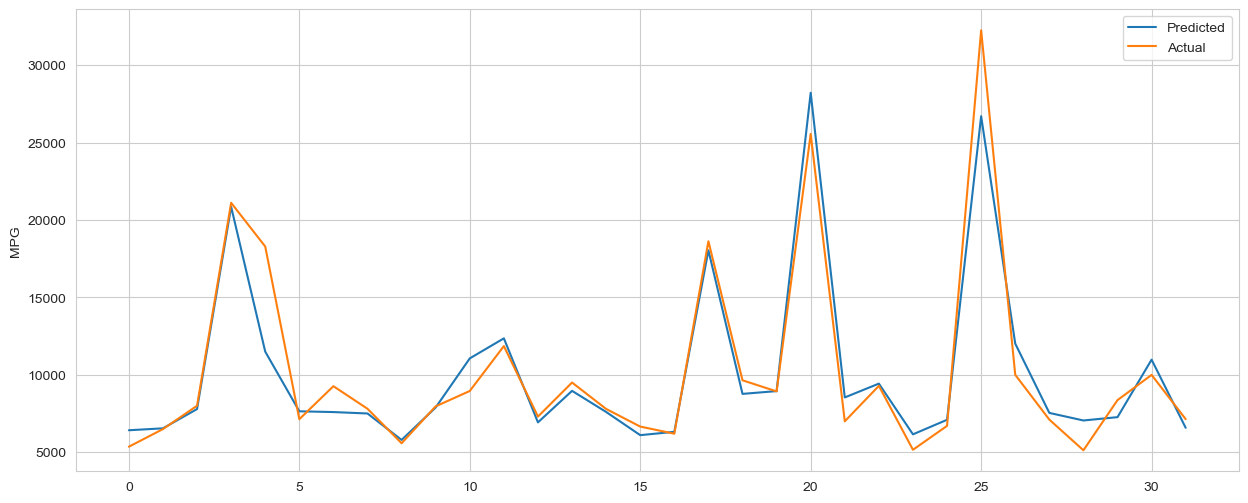

In [169]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')
plt.legend()
plt.show()

Вредноста за R2 е прилично висока и за тест множеството

In [170]:
r_square = gbr_model.score(x_test, y_test)
r_square

0.9098146987704072

In [171]:
from sklearn.metrics import mean_squared_error

gbr_model_mse = mean_squared_error(y_predict, y_test)
gbr_model_mse

3406460.2992034927

Можеме да ја видиме и грешката која ја правиме при предвидување на цената

In [172]:
import math

math.sqrt(gbr_model_mse)

1845.659854687069

Gradien Boosting има доста параметри кои маже да се нагодуваат (хипер-тјунираат), тоа го прави добар кандидат за Grid Search за да се најде најдобриот модел.
Она што пробуваме е:
- различен број на слаби модели: num_estimators = [100,200,500]
- различни рати на учење: learn_rates = [0.01,0.02,0.05,0.1]
- различни длабочини на дрво: max_depths = [4,6,8]
Со вие параметри инстанцираме објект од класата GridSearchCV, каде дополнително специфицираме cross-validation да биде 3. Исто така, сакаме за секој пробан модел да имаме резултат колку добро истиот предвидува, тоа го правиме преку параметарот return_train_score=True.
Ова тренирање ќе трае подолго, бидејќи пробуваме модели со различни параметри. На крај како резултат го добиваме најдобриот модел.

In [176]:
from sklearn.model_selection import GridSearchCV

num_estimators = [100, 200, 500]
learn_rates = [0.01, 0.02, 0.05, 0.1]
max_depths = [4, 6, 8]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths}

grid_search = GridSearchCV(GradientBoostingRegressor(min_samples_split=2, loss='squared_error'),
                           param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 500}

Ако сакате да ги видите резултатите од секој модел, тогаш го користите следниов код

In [177]:
grid_search.cv_results_

{'mean_fit_time': array([0.07337483, 0.19045393, 0.36321751, 0.08807151, 0.1700995 ,
        0.41940427, 0.09932844, 0.19856135, 0.49350969, 0.06566262,
        0.13035456, 0.32272005, 0.08590579, 0.17007454, 0.42465997,
        0.10330804, 0.20842799, 0.50159923, 0.06553149, 0.14315351,
        0.32642349, 0.08388861, 0.18330018, 0.40888818, 0.09839201,
        0.19623979, 0.50147899, 0.06716728, 0.12815603, 0.33156323,
        0.09080545, 0.17854945, 0.4208583 , 0.10338044, 0.20148905,
        0.45883107]),
 'std_fit_time': array([0.00139408, 0.06035625, 0.02231864, 0.00241108, 0.00347348,
        0.00769734, 0.00191726, 0.00228502, 0.0040851 , 0.00062939,
        0.00244914, 0.00653163, 0.00407253, 0.00595455, 0.01927567,
        0.00119147, 0.00590604, 0.00594958, 0.0012634 , 0.01592167,
        0.00552835, 0.0012714 , 0.00370222, 0.00354358, 0.0016659 ,
        0.00436451, 0.02399025, 0.00124225, 0.00247307, 0.02197367,
        0.00177162, 0.00749737, 0.0093049 , 0.00279881, 0.008

Вкупниот број на комбинации е 36 (3x4x3), односно со Grid Search сме креирале 36 модели кои се разликуваат во однос на влезните хипер-параметри. Со следниот код го печатиме рангот на секој од моделите

In [178]:
for i in range(36):
    print('Parameters:', grid_search.cv_results_['params'][i])
    print('Mean Test Score:', grid_search.cv_results_['mean_test_score'][i])
    print('Rank:', grid_search.cv_results_['rank_test_score'][i])
    print()

Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
Mean Test Score: 0.7131904439086064
Rank: 34

Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Mean Test Score: 0.8118814445496506
Rank: 11

Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
Mean Test Score: 0.8340338998337157
Rank: 6

Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
Mean Test Score: 0.6909583306395074
Rank: 35

Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}
Mean Test Score: 0.77191996094303
Rank: 19

Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}
Mean Test Score: 0.777454558632546
Rank: 13

Parameters: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100}
Mean Test Score: 0.6845809593887844
Rank: 36

Parameters: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 200}
Mean Test Score: 0.7554901277546792
Rank: 23

Parameters: {'learning_rate': 0.01, 'max_depth': 8, 

Сега пробајте да го истренирате моделот за кој што добивте најдобри резултати со Grid Search и видете ги подобрувањата во однос на првиот модел кој што го истрениравме

In [181]:
params = {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.02, 'loss': 'squared_error'}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=4, n_estimators=200)

In [182]:
y_predict = gbr_model.predict(x_test)

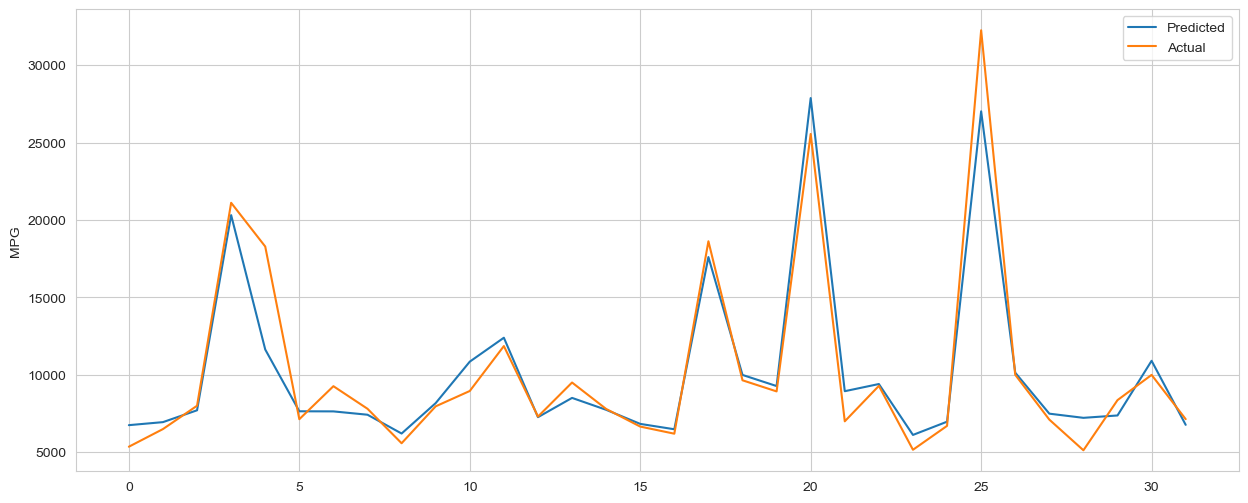

In [183]:
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')
plt.legend()
plt.show()

In [184]:
r_square = gbr_model.score(x_test, y_test)
r_square

0.9164796158254237

Грешката се намали во однос на првиот модел, што е добар резултат

In [185]:
gbr_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(gbr_model_mse)

1776.151583866796

# Вежба 7: Mean Shift кластерирање

За да го примениме Mean Shift во scikit-learn го користиме Титаник податочното множество кое базирано на информација за одредени патници на Титаник, како класа, име, пол, возраст, итн. Овие информации ќе ги користиме за да предвидиме дали патникот го преживеал потонувањето на Титаник.
Притоа, ќе се обидеме да најдеме групи со патници со слични карактеристики

In [186]:
import pandas as pd

In [187]:
titanic_data = pd.read_csv('Exercises 5 - Datasets/titanic.csv', quotechar='"')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Некои од карактеристиките не ни се од корист, па затоа ќе ги исфриле соодветните колони од податочната рамка. Колоната Survived ни кажува дали патникот преживеал (вредност 1) или не (вредност 0).
Колоната PClass ни кажува во која класа патувал (прва, втора или трета)
Age е возраста
Fare колку платил за билетот
SibSp ни кажува колку браќа/сестри патувале со патникот
Parch ни кажува колку родители патувале со патникот
Embarked ни ја кажува првата буква на пристаништето на кое се качил патникот.

In [188]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 'columns', inplace=True)
titanic_data.head()

C:\Users\dimit\AppData\Local\Temp\ipykernel_2408\3510053723.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  titanic_data.drop(['PassengerId','Name','Ticket','Cabin'], 'columns', inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Има потреба колоната за полото (Sex) да ја трансформира во нумеричка вредност (1-за машки, 0-за женски)

In [189]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'].astype(str))
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


Користиме One-hot репрезентација за колоната Embarked 

In [190]:
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'])
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


Правиме проверка дали имаме Null податоци. Имаме 177 редови каде недостасуваат одредени податоци

In [191]:
titanic_data[titanic_data.isnull().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
5,0,3,1,NaN,0,0,8.4583,0,1,0
17,1,2,1,NaN,0,0,13.0000,0,0,1
19,1,3,0,NaN,0,0,7.2250,1,0,0
26,0,3,1,NaN,0,0,7.2250,1,0,0
28,1,3,0,NaN,0,0,7.8792,0,1,0
...,...,...,...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292,1,0,0
863,0,3,0,NaN,8,2,69.5500,0,0,1
868,0,3,1,NaN,0,0,9.5000,0,0,1
878,0,3,1,NaN,0,0,7.8958,0,0,1


Ги чистиме тие редови

In [192]:
titanic_data = titanic_data.dropna()

Откако го процесиравме податочното множество, инстанцираме естиметор за Mean Shift алгоритам за кластерирање.
Единствен хипер-параметар e bandwidth кој е правопропорционален со стандардната девијација.
Со методот fit го започнуваме тренирањето

In [193]:
from sklearn.cluster import MeanShift

analyzer = MeanShift(bandwidth=50)
analyzer.fit(titanic_data)

MeanShift(bandwidth=50)

Во претходниот код ставивме случајна вредност за bandwidth параметарот. Постои помошна функција estimate_bandwidth која дава добра вредност за овој хипер-параметар. 30 е вистинската вредност.

In [194]:
from sklearn.cluster import estimate_bandwidth

estimate_bandwidth(titanic_data)

30.44675914497196

Да го видиме бројот на кластери кои беа одредени со алгоритмот за кластерирање

In [195]:
labels = analyzer.labels_

In [196]:
import numpy as np

np.unique(labels)

array([0, 1, 2], dtype=int64)

Да додадеме нова колона cluster_group во која ќе наведеме во кој кластер припаѓа даден патник

In [197]:
titanic_data['cluster_group'] = np.nan
data_length = len(titanic_data)

#pd.set_option('mode.chained_assignment',None)

for i in range(data_length):
    titanic_data.iloc[i, titanic_data.columns.get_loc('cluster_group')] = labels[i]

In [198]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,cluster_group
0,0,3,1,22.0,1,0,7.2500,0,0,1,0.0
1,1,1,0,38.0,1,0,71.2833,1,0,0,0.0
2,1,3,0,26.0,0,0,7.9250,0,0,1,0.0
3,1,1,0,35.0,1,0,53.1000,0,0,1,0.0
4,0,3,1,35.0,0,0,8.0500,0,0,1,0.0


Сега да го видиме целото податочно множество. Од 714 патници, околу 40% преживеале, средната патничка класа е 2.23 (повеќе луѓе биле во класа 2 и 3, во споредба со подобрата класа 1), имало повеќе мажи, средната цена на билетот била околу 35 долари 

In [199]:
titanic_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,cluster_group
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.634454,29.699118,0.512605,0.431373,34.694514,0.182073,0.039216,0.775910,0.051821
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930,0.386175,0.194244,0.417274,0.240040
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.741700,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000,0.000000,0.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,2.000000


Да ги групираме патниците по кластер и да ја најдеме средната вредност на сите променливи во рамки на еден кластер

In [200]:
titanic_cluster_data = titanic_data.groupby(['cluster_group']).mean()
titanic_cluster_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
cluster_group,,,,,,,,,,
0.0,0.388235,2.298529,0.651471,29.559191,0.505882,0.404412,25.415625,0.167647,0.041176,0.788235
1.0,0.741935,1.000000,0.258065,32.223226,0.709677,1.032258,192.008732,0.419355,0.000000,0.580645
2.0,1.000000,1.000000,0.666667,35.333333,0.000000,0.333333,512.329200,1.000000,0.000000,0.000000


Да ги видиме и бројот на патници во секој кластер. Гледаме дека имаме 2 кластери кои имаат репрезентативен број на патници. Третиот кластер има само 3 патници и не е репрезентативен. 
Во првиот кластер голем дел од патниците не преживеале и патниците биле од полошите класи (2 и 3 класа), има повеќе мажи од жени и цената на билетот е под просекот.
Вториот кластер се состои од голем дел од патниците кои преживеале и тоа биле патници претежно од прва класа и претежно жени кои го платиле билетот доста над просекот

In [201]:
titanic_cluster_data['Counts'] = pd.Series(titanic_data.groupby(['cluster_group']).size())
titanic_cluster_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Counts
cluster_group,,,,,,,,,,,
0.0,0.388235,2.298529,0.651471,29.559191,0.505882,0.404412,25.415625,0.167647,0.041176,0.788235,680
1.0,0.741935,1.000000,0.258065,32.223226,0.709677,1.032258,192.008732,0.419355,0.000000,0.580645,31
2.0,1.000000,1.000000,0.666667,35.333333,0.000000,0.333333,512.329200,1.000000,0.000000,0.000000,3


Да ги погледнеме податоците за вториот кластер (кластер на преживеани), можете да ја забележите вредноста на билетот што ја платиле, која за тоа време е прилично висока. 

In [202]:
titanic_data[titanic_data['cluster_group'] == 1].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,cluster_group
count,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.0
mean,0.741935,1.0,0.258065,32.223226,0.709677,1.032258,192.008732,0.419355,0.0,0.580645,1.0
std,0.444803,0.0,0.444803,15.327994,1.006431,1.016001,50.203716,0.501610,0.0,0.501610,0.0
min,0.000000,1.0,0.000000,0.920000,0.000000,0.000000,133.650000,0.000000,0.0,0.000000,1.0
25%,0.500000,1.0,0.000000,22.000000,0.000000,0.000000,151.550000,0.000000,0.0,0.000000,1.0
50%,1.000000,1.0,0.000000,31.000000,0.000000,1.000000,164.866700,0.000000,0.0,1.000000,1.0
75%,1.000000,1.0,0.500000,41.500000,1.000000,2.000000,237.522900,1.000000,0.0,1.000000,1.0
max,1.000000,1.0,1.000000,64.000000,3.000000,4.000000,263.000000,1.000000,0.0,1.000000,1.0


In [203]:
titanic_data[titanic_data['cluster_group'] == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,cluster_group
27,0,1,1,19.00,3,2,263.0000,0,0,1,1.0
88,1,1,0,23.00,3,2,263.0000,0,0,1,1.0
118,0,1,1,24.00,0,1,247.5208,1,0,0,1.0
195,1,1,0,58.00,0,0,146.5208,1,0,0,1.0
268,1,1,0,58.00,0,1,153.4625,0,0,1,1.0
269,1,1,0,35.00,0,0,135.6333,0,0,1,1.0
297,0,1,0,2.00,1,2,151.5500,0,0,1,1.0
299,1,1,0,50.00,0,1,247.5208,1,0,0,1.0
305,1,1,1,0.92,1,2,151.5500,0,0,1,1.0
311,1,1,0,18.00,2,2,262.3750,1,0,0,1.0


**Самостојна работа:** Пробајте го алгоритмот со bandiwdth=30 и анализирајте ги резултатите.
Колку кластери добивате вака?
Колку од овие кластери се репрезентативни?
Пробајте да ги објасните кластерите преку информациите за патниците во соодветните кластери

# Вежба 8: PCA и намалување на димензионалноста

Ќе користиме податочно множество за квалитет на вино. Во листата names се сите карактеристики на виното, со skiprows го скокаме првиот ред и притоа ; се користи како сепаратор

In [204]:
import pandas as pd

In [206]:
wine_data = pd.read_csv('Exercises 5 - Datasets/winequality-white.csv',
                        names=['Fixed Acidity',
                               'Volatile Acidity',
                               'Citric Acid',
                               'Residual Sugar',
                               'Chlorides',
                               'Free Sulfur dioxide',
                               'Total Sulfur dioxide',
                               'Density',
                               'pH',
                               'Sulphates',
                               'Alcohol',
                               'Quality'],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')
wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur dioxide,Total Sulfur dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Сакаме да го предвидиме квалитетот на виното од 3 (најслабо) до 9 (најквалитетно)

In [207]:
wine_data['Quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

Ги нагодуваме X и Y променливите. Во PCA ќе ги користиме само X променливите. Со scale() ги нормализираме (стандардизираме) податоците. Потоа го делиме множеството на множество за тренирање (80%) и тестирање (20%)

In [208]:
X = wine_data.drop('Quality', axis=1)
Y = wine_data['Quality']

from sklearn import preprocessing

X = preprocessing.scale(X)

from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Потоа користиме класификатор во случајов Support Vector Classifier (SVC) кој се базира на SVM

In [209]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc.fit(X_train, Y_train)

LinearSVC(dual=False, penalty='l1', tol=0.001)

Добиваме точност од околу 49% (случајна класификација би ни дала 1/7=14% точност).


In [210]:
accuracy = clf_svc.score(x_test, y_test)
accuracy

0.49183673469387756

Да видиме како намалувањето на димензионалноста влијае врз оваа точност. За да ја видиме корелацијата помеѓу променливите ќе ја користиме seaborn библиотеката. Ќе креираме топлотна мапа (sbn.heatmap) каде светло зелената боја означува силна корелација (вредноста на дијагоналата е секогаш 1). Може да се види дека Free Sulfur Dioxide е силно корелирана со Total Sulfur Dioxide, густината на виното е силно корелирана со остатоците од шекер

Traceback (most recent call last):
  File "C:\Users\dimit\anaconda3\Scripts\matplotlib-script.py", line 10, in <module>
    sys.exit(plotting._matplotlib())
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


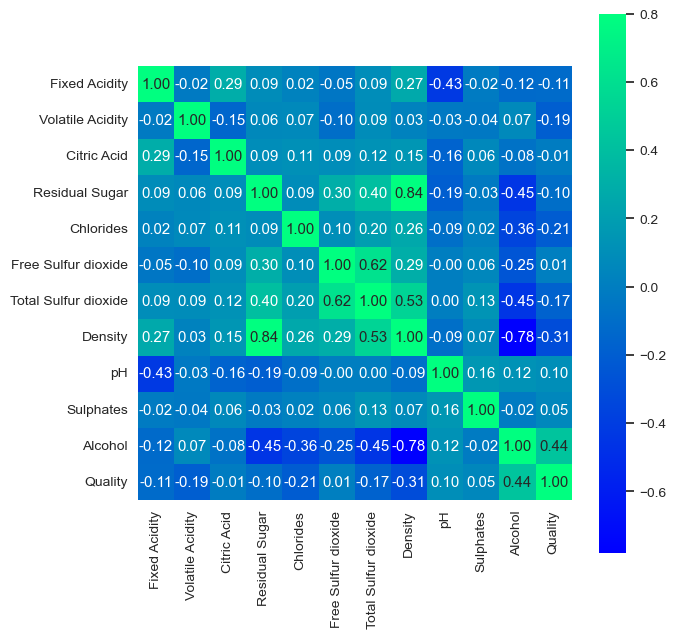

In [211]:
import matplotlib.pyplot as plt
import seaborn as sbn

corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(7, 7))
sbn.set(font_scale=0.9)
sbn.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap='winter')

!matplotlib inline
plt.show()

Сега да ја намалиме димензионалноста со користење на PCA. За почеток ќе ги оставиме сите 11 димензии

In [212]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11, whiten=True)
X_reduced = pca.fit_transform(X)

Со explained_variance_ ја добиваме големината на варијанста која е опфатена со секој од PCA векторите

In [213]:
pca.explained_variance_

array([3.2229119 , 1.57556161, 1.22192081, 1.01873034, 0.97353334,
       0.93893321, 0.7267464 , 0.59948087, 0.41422824, 0.28954625,
       0.0206533 ])

За подобра анализа ќе користиме релативни броеви (во проценти).

In [214]:
pca.explained_variance_ratio_

array([0.29293217, 0.14320363, 0.11106103, 0.09259294, 0.08848496,
       0.08534014, 0.06605437, 0.05448713, 0.03764942, 0.02631701,
       0.00187719])

За да одредиме колку димензии треба да останат најдобро е графички да ги прикажеме овие резултати. На овој Scree Plot може да се забележи лакт веќе кај втората димензија

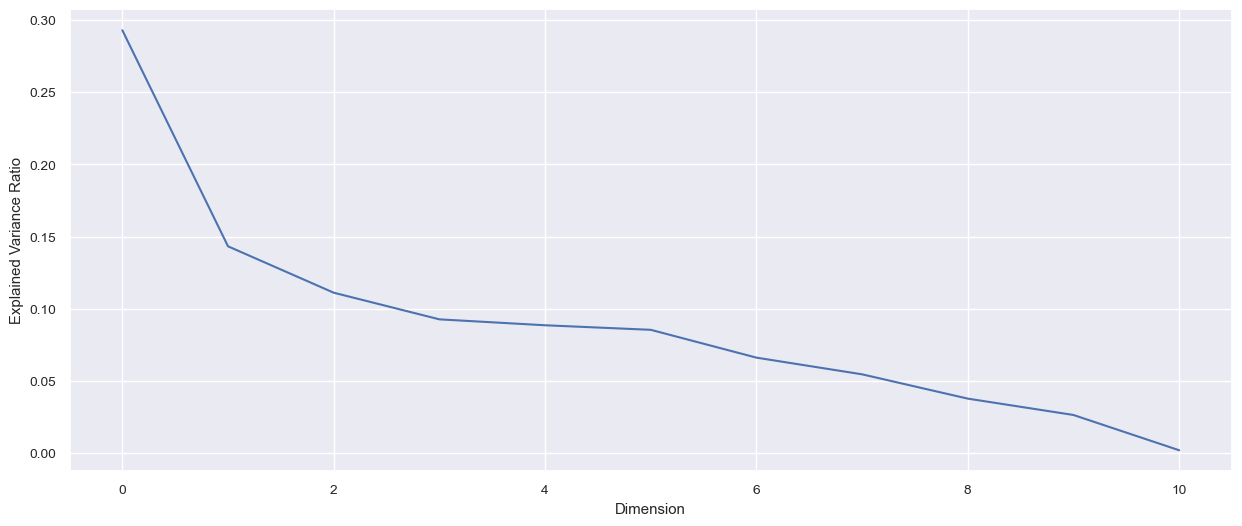

In [215]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explained Variance Ratio')
plt.show()

Точноста на класификаторт е иста, само извршивме трансформација, но не и намалување на димензионалноста

In [216]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
clf_svc_pca = LinearSVC(penalty='l1', dual=False, tol=1e-3)
clf_svc_pca.fit(X_train, Y_train)

LinearSVC(dual=False, penalty='l1', tol=0.001)

In [217]:
accuracy = clf_svc_pca.score(x_test, y_test)
accuracy

0.49183673469387756

**Самостојна работа 1:** Променете го бројот на димензии кај PCA на 9 и одредете ја точноста на моделот за тест множеството
Дали добивте поголема точност?
Зошто е тоа така?
**Самостојна работа 2:** Променете го бројот на димензии кај PCA на 6 и одредете ја точноста на моделот за тест множеството
Дали добивте поголема точност?
Што добивте за сметка на точноста
**Самостојна работа 3:** Променете го бројот на димензии кај PCA на 1 и одредете ја точноста на моделот за тест множеството
Дали ова премногу ја намали точноста на моделот?
Дали тренирањето на моделот со намалена димензионалност ја зголемува брзината на тренирањето?